In [1]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torchvision.io import read_video
import torchvision.transforms as T
import numpy as np
from PIL import Image


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [16]:
# weight = models.EfficientNet_V2_S_Weights.DEFAULT
# model = models.efficientnet_v2_s(weights = weight)
weight = models.MobileNet_V3_Small_Weights.DEFAULT
model = models.mobilenet_v3_small(weights = weight)
imTrans = weight.transforms()

In [17]:
# 모델 가중치 업데이트 중지
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [18]:
set_parameter_requires_grad(model,True)

In [21]:
model.classifier

Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=2, bias=True)
)

In [20]:
model.classifier[3] = nn.Linear(1024,2)# 마지막 레이어

In [22]:
video_path = "./video/safe/1.mp4"
stream = "video"
torchvision.set_video_backend("video_reader")
from torchvision.io import read_video

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\__init__.py:73: UserWarning: video_reader video backend is not available. Please compile torchvision from source and try again
  warnings.warn(message)


In [23]:
import glob
def videoToimage(input_size):
    torchvision.set_video_backend("video_reader")
    for c in ['safe','warn']:
        path = f"./video/{c}/*.mp4"
        file_list = glob.glob(path)
        name = 0
        for f in file_list:
            v,_,_ = read_video(f, 0, 60, pts_unit="sec",output_format="TCHW")
            print(f)
            v = v[range(0,v.size()[0], 6 )]  # 1초에 5장
            transform = T.Resize(input_size)
            v = transform(v)
            for id,t in enumerate(v):
                np_arr = np.array(t.T, dtype=np.uint8)
                img = Image.fromarray(np_arr)
                if c == 'safe':
                    img.save(f"./data/0/{name}.png")
                if c == 'warn':
                    img.save(f"./data/1/{name}.png")
                name = name +1
                


In [24]:
def testToimage(input_size):
    torchvision.set_video_backend("video_reader")
    for c in ['safe','warn']:
        path = f"./test_video/{c}/*.mp4"
        file_list = glob.glob(path)
        name = 0
        for f in file_list:
            v,_,_ = read_video(f, 0, 60, pts_unit="sec",output_format="TCHW")
            print(f)
            v = v[range(0,v.size()[0], 6 )]  # 1초에 5장
            transform = T.Resize(input_size)
            v = transform(v)
            for id,t in enumerate(v):
                np_arr = np.array(t.T, dtype=np.uint8)
                img = Image.fromarray(np_arr)
                if c == 'safe':
                    img.save(f"./data/val_image/0/{name}.png")
                if c == 'warn':
                    img.save(f"./data/val_image/1/{name}.png")
                name = name +1

In [196]:
videoToimage((224,224))

./video/safe\1.mp4
./video/safe\2.mp4
./video/safe\20221122_154032.mp4
./video/safe\3.mp4
./video/warn\20221122_095856.mp4
./video/warn\20221122_095908.mp4
./video/warn\20221122_095930.mp4
./video/warn\20221122_095941.mp4
./video/warn\20221122_095948.mp4
./video/warn\20221122_095959.mp4
./video/warn\20221122_100023.mp4
./video/warn\20221122_100032.mp4
./video/warn\20221122_153940.mp4
./video/warn\20221122_153949.mp4


In [31]:
transform = transforms.Compose([
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(os.path.join(f'./data'), imTrans)
print("데이터 정보", dataset)

데이터 정보 Dataset ImageFolder
    Number of datapoints: 230
    Root location: ./data
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )


In [33]:
dataset.__getitem__(0)[0].size()

torch.Size([3, 224, 224])

In [34]:
dataset.class_to_idx  # 0 : 안전 , 1: 위험

{'0': 0, '1': 1}

In [35]:
train_loader = torch.utils.data.DataLoader(dataset,         
                                           batch_size=8,# 배치사이즈 지정
                                           shuffle=True)        # shuffle 여부 지정

In [36]:
# 1개 batch 추출
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([8, 3, 224, 224]), torch.Size([8]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


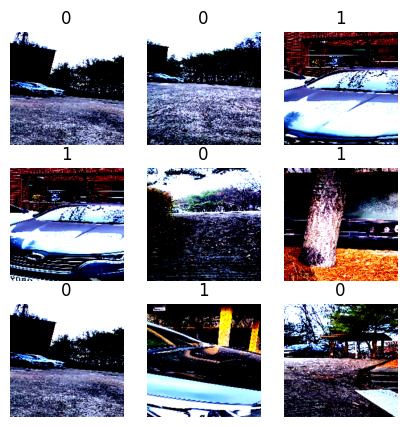

In [37]:
# ImageFolder의 속성 값인 class_to_idx를 할당
labels_map = {v:k for k, v in dataset.class_to_idx.items()}

figure = plt.figure(figsize=(5, 5))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(torch.permute(img, (1, 2, 0)))
plt.show()

In [38]:
# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
feature_extract = True
params_to_update = model.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


Params to learn:
	 classifier.3.weight
	 classifier.3.bias


In [39]:

device = 'cpu'
def fit(model, trainloader, optimizer, criterion , epochs = 10):
    for epoch in range(epochs):
        print('epoch ',epoch+1 ,'/',epochs , '-------------------------------------')
        train(model,trainloader,optimizer , criterion)  

def train(model ,dataloader , optimizer,criterion):
    model.train()
    size = len(dataloader.dataset)
    for batch , (x,y) in enumerate(dataloader):
        # 배치 인덱스와 x,y 값 배열
        # 구조 (배치 크기 , 28, 28)  (배치 크기 , 라벨)
        x = x.to(device)  # cpu는 안해도됨
        y = y.to(device)
        # 에러 계산
        pred = model(x)
        loss = criterion(pred , y)

        # 역전파
        optimizer.zero_grad()  # 경사도 값 0으로 리셋
        loss.backward()  # 역전파 진행 경사도값 구하기
        optimizer.step()  # 파라미터 값 조정   

        # 배치 n번 시 loss, 진행도 출력
        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(x)
            # x 길이와 현재 배치 인덱스 곱하면 현재 학습 위치
            # 로스 값, 현재 진행 위치 / 전체 길이
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [40]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update , lr= 1e-4)
fit(model,train_loader , optimizer_ft ,criterion, epochs=5)

epoch  1 / 5 -------------------------------------
loss: 0.541844  [    0/  230]
loss: 0.749267  [   80/  230]
loss: 0.606434  [  160/  230]
epoch  2 / 5 -------------------------------------
loss: 0.532040  [    0/  230]
loss: 0.449617  [   80/  230]
loss: 0.448140  [  160/  230]
epoch  3 / 5 -------------------------------------
loss: 0.530871  [    0/  230]
loss: 0.450840  [   80/  230]
loss: 0.427542  [  160/  230]
epoch  4 / 5 -------------------------------------
loss: 0.405553  [    0/  230]
loss: 0.319588  [   80/  230]
loss: 0.396505  [  160/  230]
epoch  5 / 5 -------------------------------------
loss: 0.626942  [    0/  230]
loss: 0.338230  [   80/  230]
loss: 0.313649  [  160/  230]


In [41]:
from torch.utils.mobile_optimizer import optimize_for_mobile

# 모델 토치 스크립트로 저장
model_scripted = torch.jit.script(model) # Export to TorchScript
optimized_model = optimize_for_mobile(model_scripted)
optimized_model._save_for_lite_interpreter('model.ptl')
# Save to file
# torch.jit.save(m, 'scriptmodule.pt')

In [159]:
test_dataset = datasets.ImageFolder(os.path.join(f'./data/val'), transform)
print("데이터 정보", dataset)

데이터 정보 Dataset ImageFolder
    Number of datapoints: 261
    Root location: ./data
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [181]:
test_dataset.__getitem__(32)[0]
transTensor = T.ToTensor()
temp = transTensor(test_dataset.__getitem__(30)[0])

In [182]:
model(torch.unsqueeze(temp,dim = 0))

tensor([[ 0.4397, -0.4235]], grad_fn=<AddmmBackward0>)

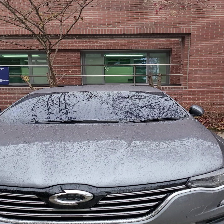

In [165]:
test_dataset.__getitem__(32)[0]